## Load Dataset

In [10]:
import pandas as pd

url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)

print(df.shape)
print(df.columns)
df.head()


(303, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Cleaning - Missing values and outliers


In [14]:
# Quick structure & missing values
# This will give us a first look at data types, shape, nulls, and target distribution

print("Shape:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nTarget distribution (0 = no heart disease, 1 = disease):")
print(df['output'].value_counts())
df.describe()

Shape: (303, 14)

Data types:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Missing values per column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Target distribution (0 = no heart disease, 1 = disease):
output
1    165
0    138
Name: count, dtype: int64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis (EDA) - Feature vs Target



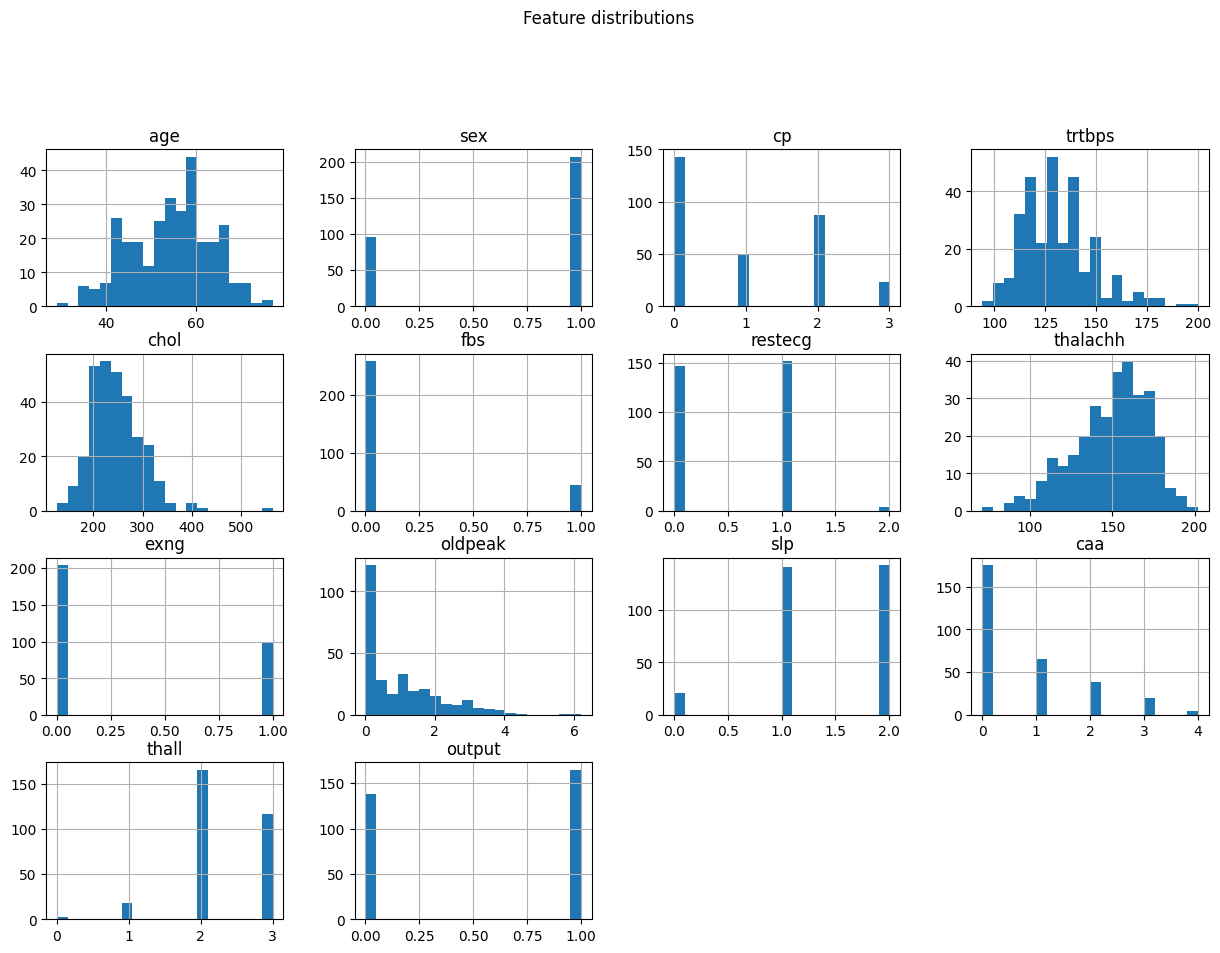

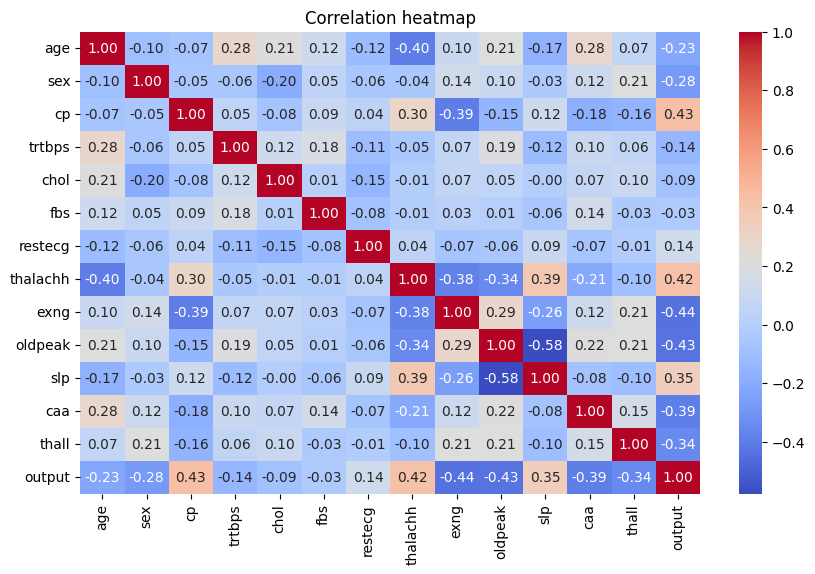

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for numerical features
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature distributions", y=1.02)
plt.show()
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

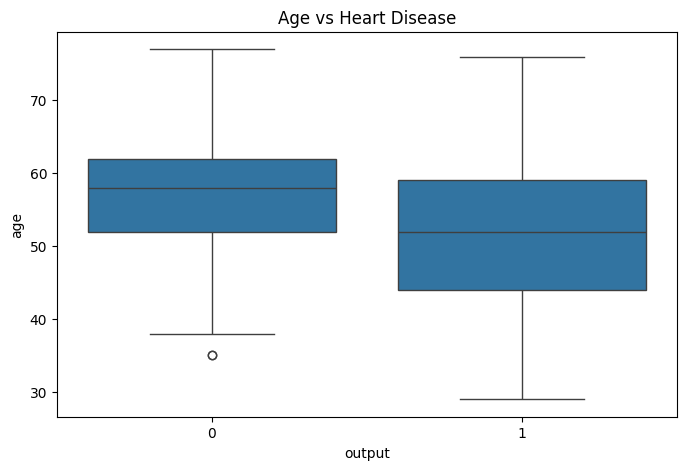

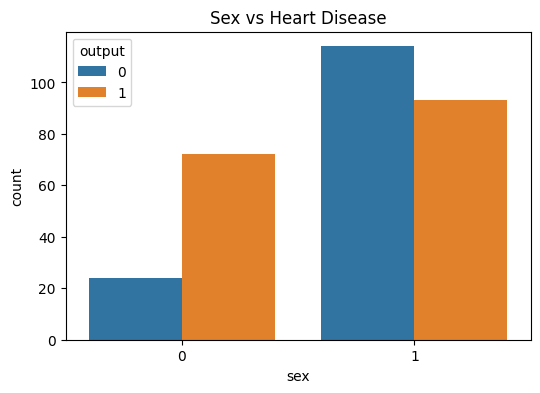

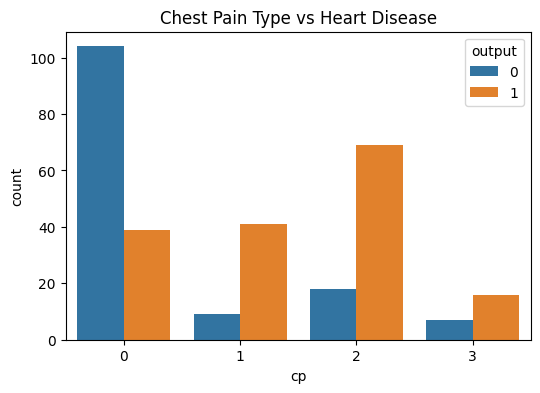

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: age distribution by target
plt.figure(figsize=(8,5))
sns.boxplot(x="output", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

# Example: sex vs target
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="output", data=df)
plt.title("Sex vs Heart Disease")
plt.show()

# Example: chest pain type vs target
plt.figure(figsize=(6,4))
sns.countplot(x="cp", hue="output", data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


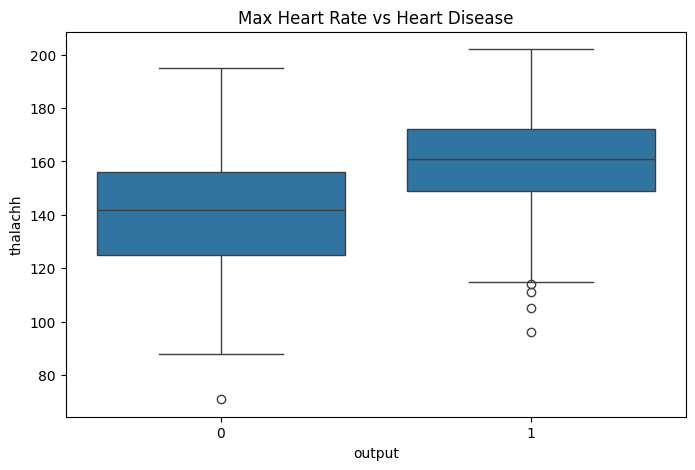

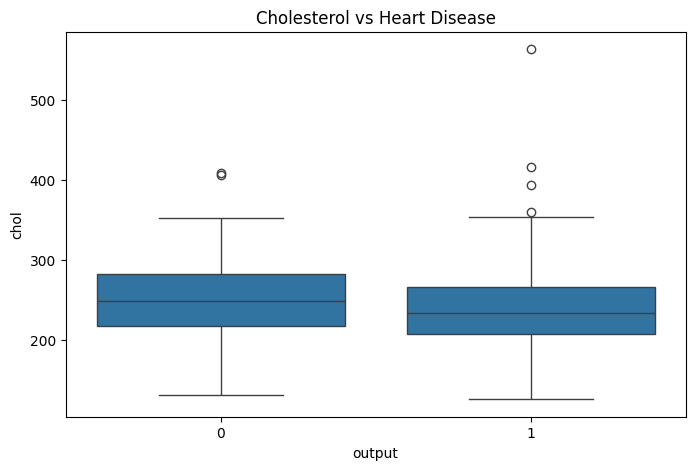

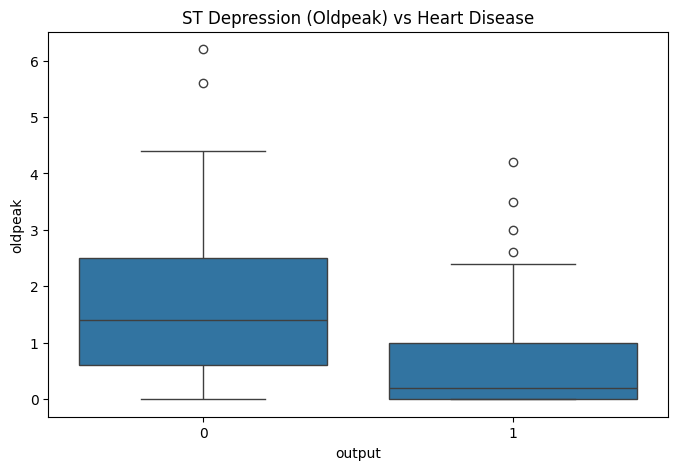

In [18]:
# Max heart rate vs target
plt.figure(figsize=(8,5))
sns.boxplot(x="output", y="thalachh", data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

# Cholesterol vs target
plt.figure(figsize=(8,5))
sns.boxplot(x="output", y="chol", data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

# Oldpeak vs target
plt.figure(figsize=(8,5))
sns.boxplot(x="output", y="oldpeak", data=df)
plt.title("ST Depression (Oldpeak) vs Heart Disease")
plt.show()


## Step 4: Feature Engineering
- One-hot encoding categorical features
- Scaling numerical features


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Copy dataset
df_processed = df.copy()

# One-hot encoding for categorical features
categorical_cols = ["cp", "restecg", "slp", "thall", "caa"]
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("Shape after one-hot encoding:", df_processed.shape)
print(df_processed.head())


Shape after one-hot encoding: (303, 23)
   age  sex  trtbps  chol  fbs  thalachh  exng  oldpeak  output   cp_1  ...  \
0   63    1     145   233    1       150     0      2.3       1  False  ...   
1   37    1     130   250    0       187     0      3.5       1  False  ...   
2   41    0     130   204    0       172     0      1.4       1   True  ...   
3   56    1     120   236    0       178     0      0.8       1   True  ...   
4   57    0     120   354    0       163     1      0.6       1  False  ...   

   restecg_2  slp_1  slp_2  thall_1  thall_2  thall_3  caa_1  caa_2  caa_3  \
0      False  False  False     True    False    False  False  False  False   
1      False  False  False    False     True    False  False  False  False   
2      False  False   True    False     True    False  False  False  False   
3      False  False   True    False     True    False  False  False  False   
4      False  False   True    False     True    False  False  False  False   

   caa_4  
0  Fa

In [20]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

print("Scaled numerical features:")
print(df_processed[numerical_cols].head())


Scaled numerical features:
        age    trtbps      chol  thalachh   oldpeak
0  0.952197  0.763956 -0.256334  0.015443  1.087338
1 -1.915313 -0.092738  0.072199  1.633471  2.122573
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705
4  0.290464 -0.663867  2.082050  0.583939 -0.379244


##  Modeling - Baseline Logistic Regression


Logistic Regression Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Confusion Matrix:
 [[23  5]
 [ 3 30]]


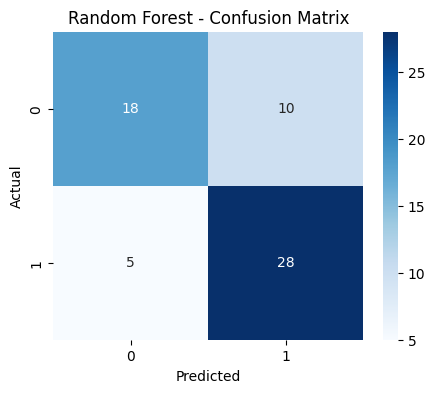

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split features and target
X = df_processed.drop("output", axis=1)
y = df_processed["output"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Confusion Matrix (visualized)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


## Random Forest Classifier


Random Forest Accuracy: 0.7540983606557377

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



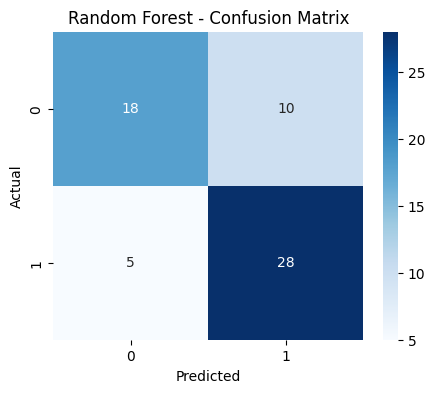

In [22]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix (visualized)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


##  XGBoost Classifier


XGBoost Accuracy: 0.7377049180327869

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [18:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


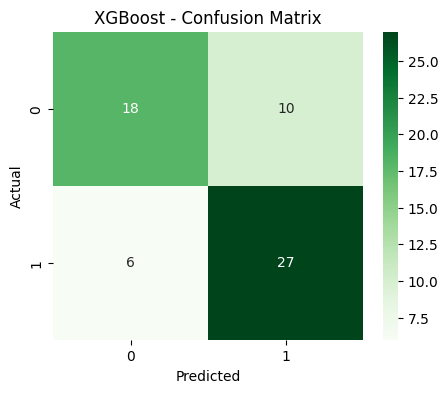

In [23]:
from xgboost import XGBClassifier

# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix (visualized)
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()


## Model comparison (Accuracy, Recall_1, F1_1)


In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def metrics_row(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    # order: precision, recall, f1, support for classes [0,1]
    pr, rc, f1, sup = precision_recall_fscore_support(y_true, y_pred, zero_division=0)
    return {
        "Model": name,
        "Accuracy": acc,
        "Recall_1": rc[1],
        "Precision_1": pr[1],
        "F1_1": f1[1]
    }

rows = []
rows.append(metrics_row("Logistic Regression", y_test, y_pred))        # from your logistic run
rows.append(metrics_row("Random Forest",       y_test, y_pred_rf))
rows.append(metrics_row("XGBoost",             y_test, y_pred_xgb))

pd.DataFrame(rows).sort_values("Recall_1", ascending=False)


,Model,Accuracy,Recall_1,Precision_1,F1_1
0,Logistic Regression,0.868852,0.909091,0.857143,0.882353
1,Random Forest,0.754098,0.848485,0.736842,0.788732
2,XGBoost,0.737705,0.818182,0.729730,0.771429


##  Hyperparameter Tuning — Random Forest


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]  # try to boost recall of class 1
}

rf_clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    rf_clf,
    param_grid,
    scoring="recall",            # focus on recall (class-averaged)
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nReport:\n", classification_report(y_test, y_pred_best_rf))


Best params: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.7704918032786885

Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



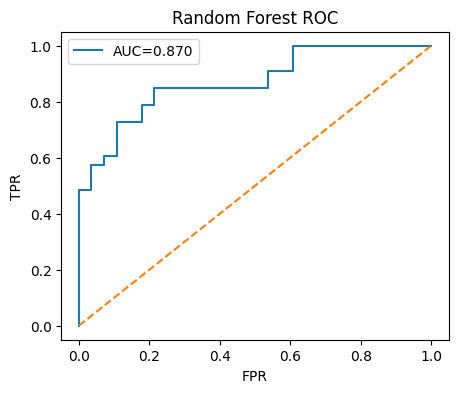

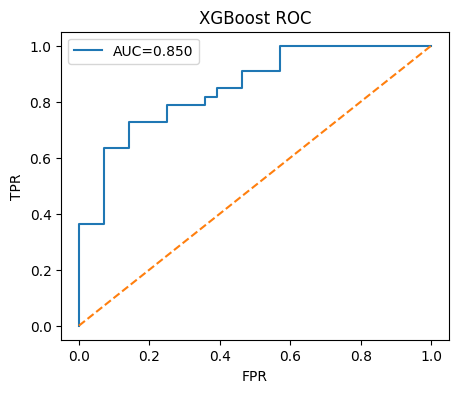

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc(model, X_te, y_te, title):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:,1]
    else:
        # for models without predict_proba (rare here)
        y_proba = model.decision_function(X_te)
    auc = roc_auc_score(y_te, y_proba)
    fpr, tpr, _ = roc_curve(y_te, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
    plt.plot([0,1],[0,1],"--")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title(title); plt.legend(); plt.show()

plot_roc(best_rf if 'best_rf' in globals() else rf, X_test, y_test, "Random Forest ROC")
plot_roc(best_xgb if 'best_xgb' in globals() else xgb, X_test, y_test, "XGBoost ROC")
